In [288]:
%pip install pandas
%pip install numpy
%pip install scipy
%pip install matplotlib
%pip install statsmodels


[notice] A new release of pip is available: 24.2 -> 25.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 24.2 -> 25.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 24.2 -> 25.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 24.2 -> 25.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
  Using cached patsy-1.0.1-py2.py3-none-any.whl.metadata (3.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 27.2 MB/s eta 0:00:0031m28.4 MB/s eta 0:00:01
Using cached patsy-1.0.1-py2.py3-none-any.whl (232 kB)

[notice] A new release of pip is available: 24.2 -> 25.2
[notice] To update, 

In [ ]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy.stats as stats
# import scipy.stats as stats

### Load Necessary Data ###

In [256]:

ai_exp_2025 = pd.read_csv("../data/Org-Expectations-Survey-2025/33101047.csv")

ai_exp_2024 = pd.read_csv("../data/Org-Expectations-Survey-2024/33100880.csv")


In [257]:
column_headers = ai_exp_2025.columns.values.tolist()
print(column_headers)

['REF_DATE', 'GEO', 'DGUID', 'Business characteristics', "Business's or organization's expectation of the impact of artificial intelligence on total employment", 'UOM', 'UOM_ID', 'SCALAR_FACTOR', 'SCALAR_ID', 'VECTOR', 'COORDINATE', 'VALUE', 'STATUS', 'SYMBOL', 'TERMINATED', 'DECIMALS']


In [258]:
ai_exp_2025.rename({'Business\'s or organization\'s expectation of the impact of artificial intelligence on total employment': 'Survey_Question'}, axis=1, inplace=True)
ai_exp_2024.rename({'Business\'s or organization\'s expectation of the impact of artificial intelligence on total employment': 'Survey_Question'}, axis=1, inplace=True)

In [259]:
ai_exp_2025['Business characteristics'] = ai_exp_2025['Business characteristics'].astype(str)
ai_exp_2024['Business characteristics'] = ai_exp_2024['Business characteristics'].astype(str)

In [260]:
column_headers = ai_exp_2025.columns.values.tolist()
print(column_headers)

['REF_DATE', 'GEO', 'DGUID', 'Business characteristics', 'Survey_Question', 'UOM', 'UOM_ID', 'SCALAR_FACTOR', 'SCALAR_ID', 'VECTOR', 'COORDINATE', 'VALUE', 'STATUS', 'SYMBOL', 'TERMINATED', 'DECIMALS']


In [261]:
ai_exp_2025 = ai_exp_2025[['GEO', 'Business characteristics', 'Survey_Question', 'VALUE', 'STATUS']]
ai_exp_2024 = ai_exp_2024[['GEO', 'Business characteristics', 'Survey_Question', 'VALUE', 'STATUS']]

Masks for 2025 Q3 data to help isolate certain points for analysis

In [262]:
naics_mask25 = ai_exp_2025['Business characteristics'].str.contains(r'(.*\[)', regex=True)
all_industry_mask25 = ai_exp_2025['Business characteristics'].str.contains('(NAICS)')
low_quality_mask25 = ~ai_exp_2025['STATUS'].eq('F')

# ai_agree_mask25 = ai_exp_2025['Survey_Question'].str.contains('increase')
# ai_disagree_mask25 = ai_exp_2025['Survey_Question'].str.contains('decrease')
# ai_neutral_mask25 = ai_exp_2025['Survey_Question'].str.contains('no change')
# ai_na_mask25 = ai_exp_2025['Survey_Question'].str.contains('unknown')

no_canada_mask25 = ~ai_exp_2025['GEO'].eq('Canada')
only_canada_mask25 = ai_exp_2025['GEO'].eq('Canada')

industry_positive_mask25 = (naics_mask25 & low_quality_mask25 & only_canada_mask25)

/var/folders/sb/b8r8b79d4211ttjd_t_4m83w0000gn/T/ipykernel_98004/3566984815.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  naics_mask25 = ai_exp_2025['Business characteristics'].str.contains(r'(.*\[)', regex=True)
/var/folders/sb/b8r8b79d4211ttjd_t_4m83w0000gn/T/ipykernel_98004/3566984815.py:2: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  all_industry_mask25 = ai_exp_2025['Business characteristics'].str.contains('(NAICS)')


Masks for 2024 Q3 data to help isolate certain points for analysis

In [263]:
naics_mask24 = ai_exp_2024['Business characteristics'].str.contains(r'(.*\[)', regex=True)
all_industry_mask24 = ai_exp_2024['Business characteristics'].str.contains('(NAICS)')
low_quality_mask24 = ~ai_exp_2024['STATUS'].eq('F')

# ai_agree_mask24 = ai_exp_2024['Survey_Question'].str.contains('increase')
# ai_disagree_mask24 = ai_exp_2024['Survey_Question'].str.contains('decrease')
# ai_neutral_mask24 = ai_exp_2024['Survey_Question'].str.contains('no change')
# ai_na_mask24 = ai_exp_2024['Survey_Question'].str.contains('no change')

no_canada_mask24 = ~ai_exp_2024['GEO'].eq('Canada')
only_canada_mask24 = ai_exp_2024['GEO'].eq('Canada')

industry_positive_mask24 = (naics_mask24 & low_quality_mask24 & only_canada_mask24)


/var/folders/sb/b8r8b79d4211ttjd_t_4m83w0000gn/T/ipykernel_98004/3587927683.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  naics_mask24 = ai_exp_2024['Business characteristics'].str.contains(r'(.*\[)', regex=True)
/var/folders/sb/b8r8b79d4211ttjd_t_4m83w0000gn/T/ipykernel_98004/3587927683.py:2: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  all_industry_mask24 = ai_exp_2024['Business characteristics'].str.contains('(NAICS)')


#### Begin Analysis for Thoughts on Employment Increase Between Industries ####

In [ ]:
ai_exp_2025_naic = ai_exp_2025[industry_positive_mask25]
ai_exp_2025_naic = ai_exp_2025_naic.reset_index(drop=True)

ai_exp_2024_naic = ai_exp_2024[industry_positive_mask24]
ai_exp_2024_naic = ai_exp_2024_naic.reset_index(drop=True)


Calculate an overall setiment using the increase, decrease, no change, and unknown responses with the assumption that a decrease in total employment is negative and all other responses are positive.

In [265]:
pivot_2025_naic = ai_exp_2025_naic.pivot_table(index='Business characteristics', columns='Survey_Question', values='VALUE')

In [266]:
for series_name, _ in pivot_2025_naic.items():
    pivot_2025_naic = pivot_2025_naic[pivot_2025_naic[series_name].notnull()]

    short_name = series_name.split(",")[1].strip()
    pivot_2025_naic.rename({series_name: short_name}, axis=1, inplace=True)


In [268]:
pivot_2025_naic["Overall_Thoughts"] = (pivot_2025_naic["increase"] * 1) + (pivot_2025_naic["decrease"] * 0) + (pivot_2025_naic["no change"] * 0.7) + (pivot_2025_naic["unknown"] * 0.5)

In [269]:
pivot_2025_naic

Survey_Question,decrease,increase,no change,unknown,Overall_Thoughts
Business characteristics,,,,,
Accommodation and food services [72],13.2,0.4,83.8,2.6,60.36
"Administrative and support, waste management and remediation services [56]",7.8,20.3,65.6,6.3,69.37
"Arts, entertainment and recreation [71]",11.5,2.4,82.2,3.9,61.89
Construction [23],2.0,1.2,90.2,6.5,67.59
Finance and insurance [52],14.3,3.7,77.0,5.0,60.10
Health care and social assistance [62],5.0,1.6,85.5,7.8,65.35
Information and cultural industries [51],12.8,17.4,50.9,18.9,62.48
Manufacturing [31-33],3.8,4.1,73.6,18.5,64.87
"Mining, quarrying, and oil and gas extraction [21]",0.5,0.0,90.4,9.1,67.83


In [271]:
pivot_2024_naic = ai_exp_2024_naic.pivot_table(index='Business characteristics', columns='Survey_Question', values='VALUE')

In [272]:
for series_name, _ in pivot_2024_naic.items():
    pivot_2024_naic = pivot_2024_naic[pivot_2024_naic[series_name].notnull()]

    short_name = series_name.split(",")[1].strip()
    pivot_2024_naic.rename({series_name: short_name}, axis=1, inplace=True)


/var/folders/sb/b8r8b79d4211ttjd_t_4m83w0000gn/T/ipykernel_98004/1318392945.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pivot_2024_naic.rename({series_name: short_name}, axis=1, inplace=True)


In [273]:
pivot_2024_naic["Overall_Thoughts"] = (pivot_2024_naic["increase"] * 1) + (pivot_2024_naic["decrease"] * 0) + (pivot_2024_naic["no change"] * 0.7) + (pivot_2024_naic["unknown"] * 0.5)

In [276]:

print(pivot_2024_naic.index.name)

Business characteristics


In [274]:
pivot_2024_naic

Survey_Question,decrease,increase,no change,unknown,Overall_Thoughts
Business characteristics,,,,,
"Administrative and support, waste management and remediation services [56]",14.8,5.1,75.3,4.9,60.26
"Agriculture, forestry, fishing and hunting [11]",1.2,0.0,98.8,0.0,69.16
"Arts, entertainment and recreation [71]",2.2,0.9,85.3,11.6,66.41
Construction [23],1.9,0.2,90.7,7.1,67.24
Finance and insurance [52],5.5,7.9,70.6,16.0,65.32
Health care and social assistance [62],7.3,14.7,75.9,2.1,68.88
Information and cultural industries [51],9.3,29.3,57.7,3.7,71.54
Manufacturing [31-33],3.7,14.7,70.6,11.0,69.62
"Mining, quarrying, and oil and gas extraction [21]",3.6,0.0,92.6,3.8,66.72


In [281]:
pivot_2025_naic = pivot_2025_naic[['Overall_Thoughts']]
pivot_2024_naic = pivot_2024_naic[['Overall_Thoughts']]

ai_exp_naic = pivot_2025_naic.merge(pivot_2024_naic, left_index=True, right_index=True,
          suffixes=('_2025', '_2024'))

In [283]:
ai_exp_naic['Difference'] = ai_exp_naic['Overall_Thoughts_2025'] - ai_exp_naic['Overall_Thoughts_2024']

ai_exp_naic

Survey_Question,Overall_Thoughts_2025,Overall_Thoughts_2024,Difference
Business characteristics,,,
"Administrative and support, waste management and remediation services [56]",69.37,60.26,9.11
"Arts, entertainment and recreation [71]",61.89,66.41,-4.52
Construction [23],67.59,67.24,0.35
Finance and insurance [52],60.10,65.32,-5.22
Health care and social assistance [62],65.35,68.88,-3.53
Information and cultural industries [51],62.48,71.54,-9.06
Manufacturing [31-33],64.87,69.62,-4.75
"Mining, quarrying, and oil and gas extraction [21]",67.83,66.72,1.11
"Professional, scientific and technical services [54]",62.18,65.05,-2.87


Check for normal distribution to determine whether to use a parametric or nonparametric test.

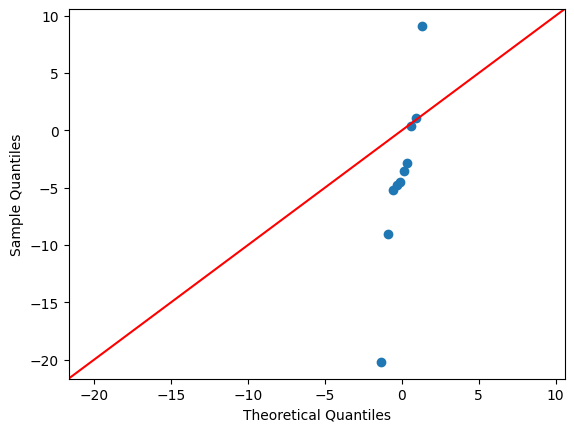

In [291]:
differences = ai_exp_naic['Difference']
differences = differences.to_numpy()

# stats.probplot(differences, dist="norm", plot=pylab)
sm.qqplot(differences, line="45")
plt.show()

Resulting Q-Q Plot indicates it is not normally distributed and will use the non-parametric Wilcoxon test to see if there's a significant change in the expected AI business impact between 2024 and 2025.

In [294]:
ai_exp_naic['temp'] = abs(ai_exp_naic['Difference'])

ai_exp_naic['rank'] = ai_exp_naic['temp'].rank(method='min')

In [296]:
ai_exp_naic.drop(['temp'], axis=1)

Survey_Question,Overall_Thoughts_2025,Overall_Thoughts_2024,Difference,rank
Business characteristics,,,,
"Administrative and support, waste management and remediation services [56]",69.37,60.26,9.11,9.0
"Arts, entertainment and recreation [71]",61.89,66.41,-4.52,5.0
Construction [23],67.59,67.24,0.35,1.0
Finance and insurance [52],60.10,65.32,-5.22,7.0
Health care and social assistance [62],65.35,68.88,-3.53,4.0
Information and cultural industries [51],62.48,71.54,-9.06,8.0
Manufacturing [31-33],64.87,69.62,-4.75,6.0
"Mining, quarrying, and oil and gas extraction [21]",67.83,66.72,1.11,2.0
"Professional, scientific and technical services [54]",62.18,65.05,-2.87,3.0


In [298]:
ai_exp_naic['pos_rank'] = ai_exp_naic['rank'].where(ai_exp_naic['Difference'] > 0, 0)
ai_exp_naic['neg_rank'] = ai_exp_naic['rank'].where(ai_exp_naic['Difference'] < 0, 0)

In [305]:
ai_exp_naic['temp'] = np.where(ai_exp_naic['Difference'] != 0, 1, 0)
sum_nonzero = ai_exp_naic['temp'].sum()

ai_exp_naic.drop(['temp'], axis=1)

Survey_Question,Overall_Thoughts_2025,Overall_Thoughts_2024,Difference,rank,pos_rank,neg_rank
Business characteristics,,,,,,
"Administrative and support, waste management and remediation services [56]",69.37,60.26,9.11,9.0,9.0,0.0
"Arts, entertainment and recreation [71]",61.89,66.41,-4.52,5.0,0.0,5.0
Construction [23],67.59,67.24,0.35,1.0,1.0,0.0
Finance and insurance [52],60.10,65.32,-5.22,7.0,0.0,7.0
Health care and social assistance [62],65.35,68.88,-3.53,4.0,0.0,4.0
Information and cultural industries [51],62.48,71.54,-9.06,8.0,0.0,8.0
Manufacturing [31-33],64.87,69.62,-4.75,6.0,0.0,6.0
"Mining, quarrying, and oil and gas extraction [21]",67.83,66.72,1.11,2.0,2.0,0.0
"Professional, scientific and technical services [54]",62.18,65.05,-2.87,3.0,0.0,3.0


In [300]:
sum_pos = ai_exp_naic['pos_rank'].sum()
sum_neg = ai_exp_naic['neg_rank'].sum()

Our Null hypothesis is that the negative and positive ranks are approximately the same. If the null hypothesis is disproven then there's significant change in the thoughts on the affects of AI on employment.

z = (W - $\mu$ w) / $\sigma$ w

In [308]:
W = sum_pos
mu = (sum_nonzero * (sum_nonzero + 1) / 4)
sigma = math.sqrt(sum_nonzero * (sum_nonzero + 1) * ((2*sum_nonzero) + 1)/24)

z = (W - mu) / sigma

In [ ]:
p_value_two_tailed = 2 * stats.norm.sf(abs(z))

np.float64(-1.5799062934566392)